In [106]:
import numpy as np
import pandas as pd
import sklearn
df = pd.read_csv('/Users/Jiwon/Documents/GitHub/advanced_project/jiwon_project/csv_files/preprocessing_filtered.csv')

In [107]:
df

,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,price,estimated_occupancy_l365d,estimated_revenue_l365d,availability_60,availability_365,instant_bookable,...,neighborhood_overview_exists,host_about_length_group,host_is_superhost,host_has_profile_pic,host_identity_verified,host_response_time_score,host_response_rate_score,host_acceptance_rate_score,host_location_ny,host_location_boolean
0,Prospect Heights,Brooklyn,40.673760,-73.966110,200.0,0,0.0,57,362,0,...,1,long,0,1,1,4.0,4,4,1,1
1,East Harlem,Manhattan,40.792454,-73.940742,82.0,0,0.0,0,204,0,...,1,empty,0,1,1,4.0,4,4,1,1
2,Boerum Hill,Brooklyn,40.684420,-73.980680,765.0,0,0.0,49,326,0,...,1,long,0,1,1,3.0,4,2,1,1
3,Harlem,Manhattan,40.818058,-73.946671,139.0,255,35445.0,18,25,0,...,1,long,1,1,1,4.0,4,4,1,1
4,Williamsburg,Brooklyn,40.710651,-73.950874,130.0,154,20020.0,22,38,0,...,1,long,1,1,1,4.0,4,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22303,Harlem,Manhattan,40.813794,-73.952399,72.0,0,0.0,53,358,0,...,0,empty,0,1,1,4.0,4,4,1,1
22304,Bedford-Stuyvesant,Brooklyn,40.685500,-73.919510,58.0,0,0.0,58,363,0,...,0,long,1,1,1,4.0,4,4,1,1
22305,Kips Bay,Manhattan,40.745290,-73.979380,299.0,0,0.0,39,99,0,...,0,empty,0,1,1,4.0,4,4,0,1
22306,Theater District,Manhattan,40.757133,-73.983124,200.0,0,0.0,60,365,1,...,0,long,0,1,1,4.0,4,4,1,1


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22308 entries, 0 to 22307
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood_cleansed        22308 non-null  object 
 1   neighbourhood_group_cleansed  22308 non-null  object 
 2   latitude                      22308 non-null  float64
 3   longitude                     22308 non-null  float64
 4   price                         22308 non-null  float64
 5   estimated_occupancy_l365d     22308 non-null  int64  
 6   estimated_revenue_l365d       22308 non-null  float64
 7   availability_60               22308 non-null  int64  
 8   availability_365              22308 non-null  int64  
 9   instant_bookable              22308 non-null  int64  
 10  is_long_term                  22308 non-null  int64  
 11  is_activate                   22308 non-null  int64  
 12  amenities                     22308 non-null  object 
 13  a

In [109]:
df.isnull().sum()

neighbourhood_cleansed           0
neighbourhood_group_cleansed     0
latitude                         0
longitude                        0
price                            0
estimated_occupancy_l365d        0
estimated_revenue_l365d          0
availability_60                  0
availability_365                 0
instant_bookable                 0
is_long_term                     0
is_activate                      0
amenities                        0
amenities_cnt                    0
room_type                        0
structure_type                  28
structure_category               0
accommodates                     0
bath_score_mul                   0
beds                             0
number_of_reviews                0
number_of_reviews_ltm            0
number_of_reviews_l30d           0
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanliness        0
review_scores_checkin            0
review_scores_communication      0
review_scores_locati

In [110]:
# structure_type 결측치 제거

df['structure_type'] = df['structure_type'].fillna('rental_unit')

In [111]:
df['structure_type'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
22303    False
22304    False
22305    False
22306    False
22307    False
Name: structure_type, Length: 22308, dtype: bool

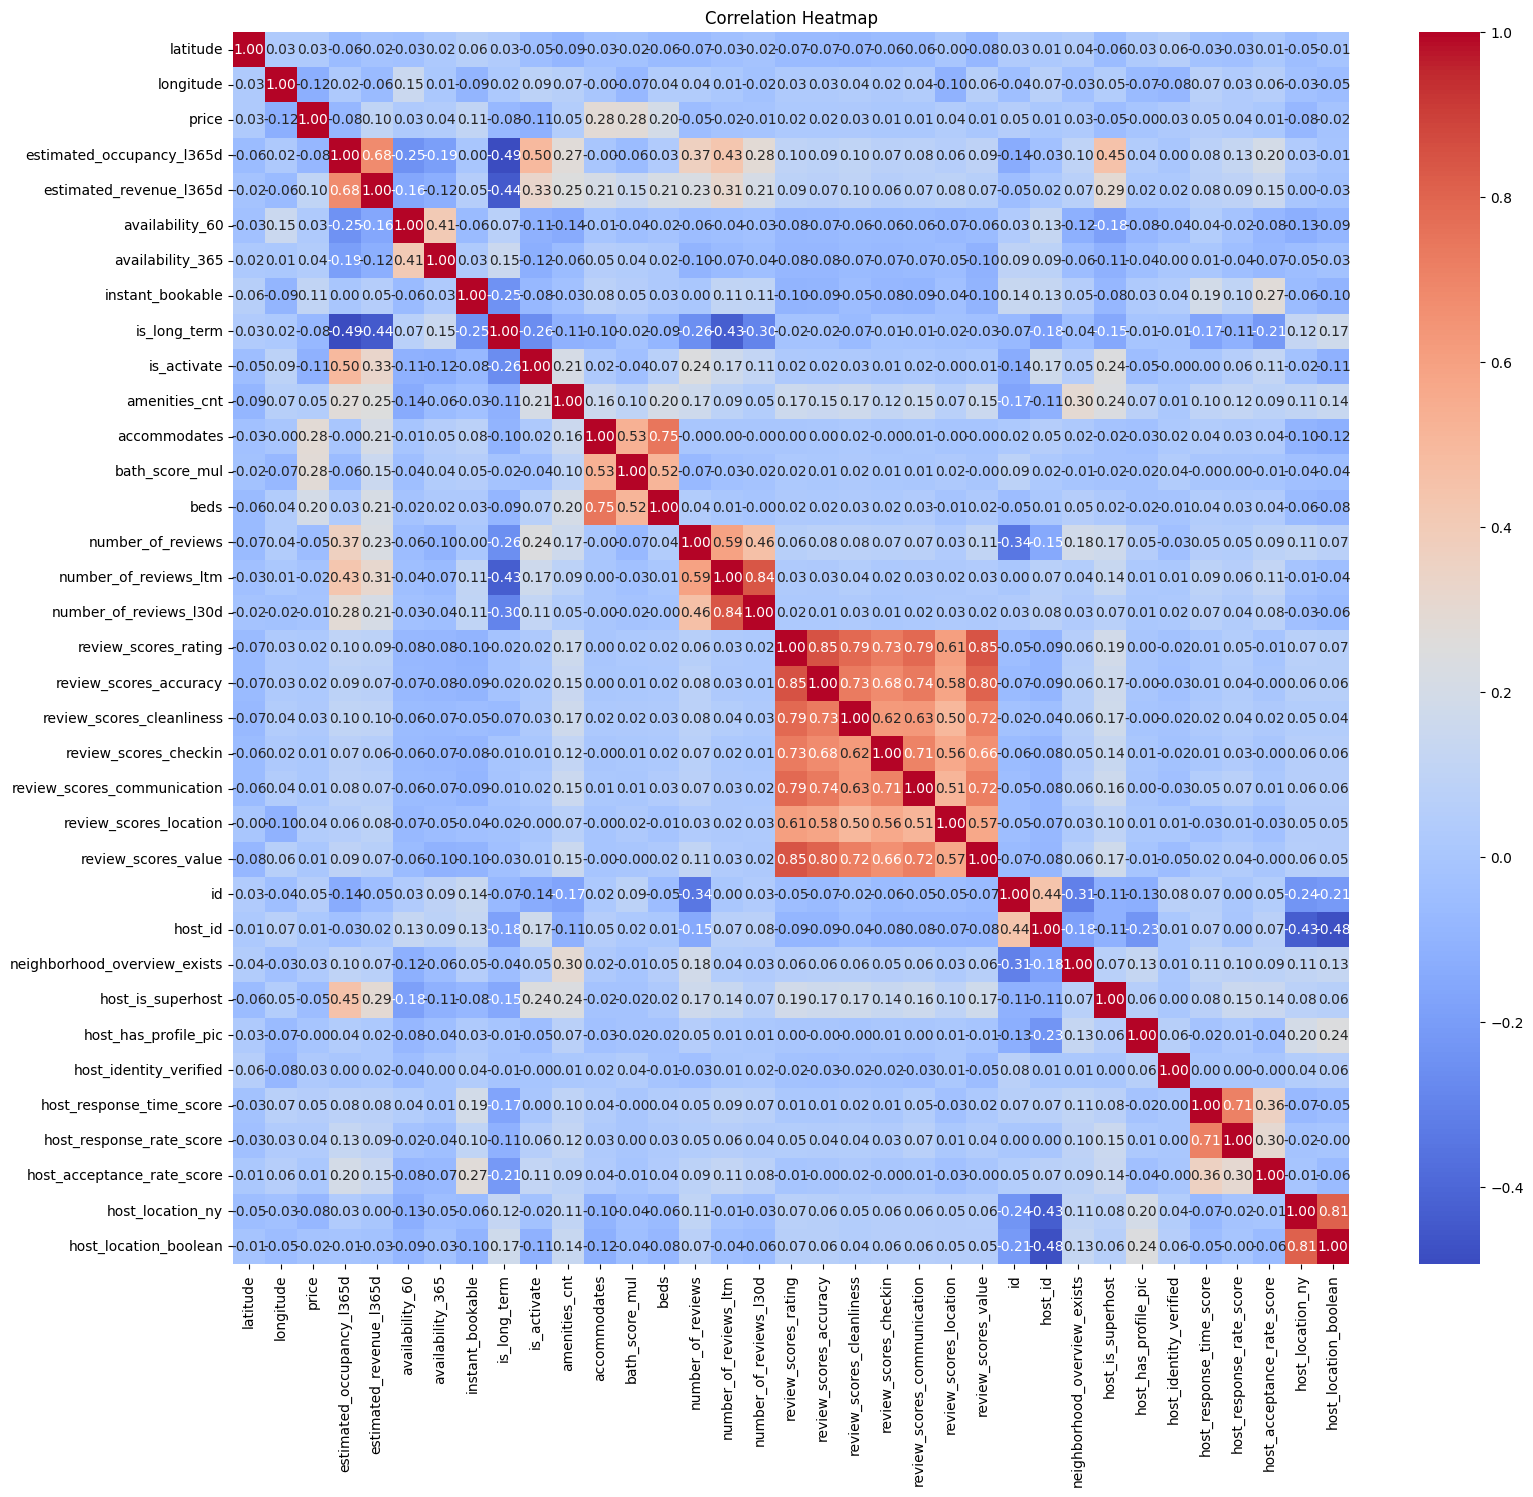

In [112]:
# estimated occupancy rate, estimated revenue rate 각각 상관관계 알아보기

corr_matrix = df.corr(numeric_only=True)

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(18,16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [113]:
df[['room_type', 'structure_type', 'structure_category', 'accommodates', 'bath_score_mul', 'beds']]

,room_type,structure_type,structure_category,accommodates,bath_score_mul,beds
0,Private room,rental unit,Residential,1,0.5,1
1,Private room,condo,Residential,2,1.0,1
2,Private room,home,Residential,2,2.5,5
3,Entire home/apt,home,Residential,2,1.0,1
4,Private room,rental unit,Residential,2,0.5,1
...,...,...,...,...,...,...
22303,Private room,rental unit,Residential,1,0.5,1
22304,Private room,rental unit,Residential,2,1.0,1
22305,Entire home/apt,rental unit,Residential,5,2.0,3
22306,Entire home/apt,rental unit,Residential,4,1.0,2


In [114]:
# 필요 없는 컬럼 삭제 

drop_cols = ['availability_60', 'amenities', 'number_of_reviews_l30d', 'structure_category', 'id', 'host_id']
df= df.drop(drop_cols, axis=1)

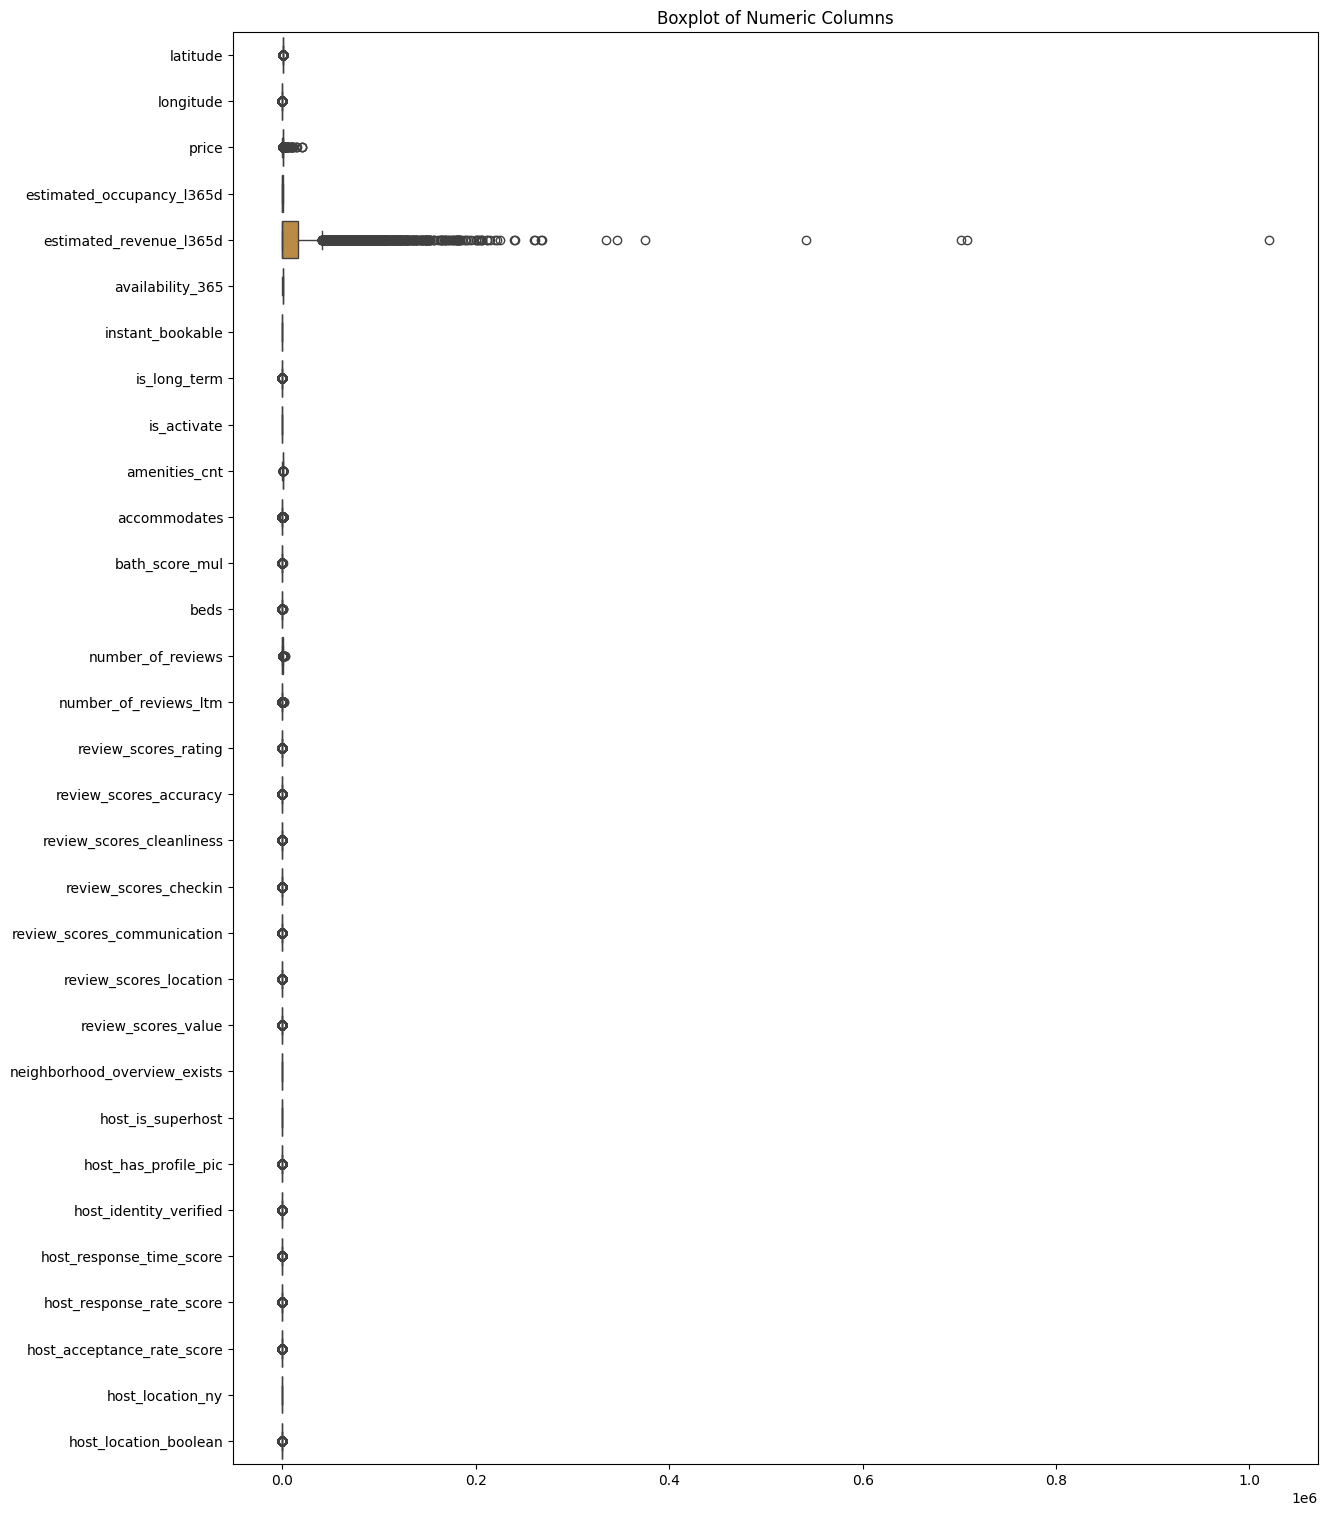

In [115]:
# 이상치 boxplot  ---> 우선 이상치 제거 안하고 하기로 함. 종속 변수들을 놓고, y변수는 estimated_revenue_l365d 가 될 것

import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df_x.select_dtypes(include='number').columns

plt.figure(figsize=(14, len(num_cols)*0.6))
sns.boxplot(data=df[num_cols], orient='h')
plt.title('Boxplot of Numeric Columns')
plt.show()


In [ ]:
# 인코딩
from sklearn.preprocessing import LabelEncoder

# town => 라벨 인코딩
le = LabelEncoder()
df['town_encoded'] = le.fit_transform(df['neighbourhood_cleansed'])

# borough ==> 원핫 인코딩
df = pd.get_dummies(df, columns=['neighbourhood_group_cleansed'])

# room_type ==> 원핫 인코딩


In [119]:
df

,neighbourhood_cleansed,latitude,longitude,price,estimated_occupancy_l365d,estimated_revenue_l365d,availability_365,instant_bookable,is_long_term,is_activate,...,host_response_rate_score,host_acceptance_rate_score,host_location_ny,host_location_boolean,town_encoded,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island
0,Prospect Heights,40.673760,-73.966110,200.0,0,0.0,362,0,1,0,...,4,4,1,1,159,False,True,False,False,False
1,East Harlem,40.792454,-73.940742,82.0,0,0.0,204,0,1,1,...,4,4,1,1,62,False,False,True,False,False
2,Boerum Hill,40.684420,-73.980680,765.0,0,0.0,326,0,0,1,...,4,2,1,1,18,False,True,False,False,False
3,Harlem,40.818058,-73.946671,139.0,255,35445.0,25,0,0,1,...,4,4,1,1,96,False,False,True,False,False
4,Williamsburg,40.710651,-73.950874,130.0,154,20020.0,38,0,0,1,...,4,4,1,1,214,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22303,Harlem,40.813794,-73.952399,72.0,0,0.0,358,0,1,0,...,4,4,1,1,96,False,False,True,False,False
22304,Bedford-Stuyvesant,40.685500,-73.919510,58.0,0,0.0,363,0,1,0,...,4,4,1,1,12,False,True,False,False,False
22305,Kips Bay,40.745290,-73.979380,299.0,0,0.0,99,0,1,0,...,4,4,0,1,114,False,False,True,False,False
22306,Theater District,40.757133,-73.983124,200.0,0,0.0,365,1,1,0,...,4,4,1,1,191,False,False,True,False,False


In [124]:
df[['name_length_group', 'description_length_group', 'host_about_length_group']]

,name_length_group,description_length_group,host_about_length_group
0,short_or_med,short_or_avg,long
1,long,short_or_avg,empty
2,short_or_med,short_or_avg,long
3,short_or_med,short_or_avg,long
4,short_or_med,long,long
...,...,...,...
22303,short_or_med,long,empty
22304,short_or_med,long,long
22305,short_or_med,long,empty
22306,short_or_med,long,long


In [125]:
df['name_length_group'].unique()

array(['short_or_med', 'long'], dtype=object)

In [126]:
df['description_length_group'].unique()

array(['short_or_avg', 'long', 'empty'], dtype=object)

In [128]:
df['host_about_length_group'].unique()

array(['long', 'empty', 'short_or_med'], dtype=object)

In [129]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [130]:
df['structure_type'].unique()

array(['rental unit', 'condo', 'home', 'guest suite', 'place', 'loft',
       'townhouse', 'bed and breakfast', 'serviced apartment',
       'guesthouse', 'houseboat', 'boutique hotel', 'rental_unit', 'boat',
       'villa', 'religious building', 'casa particular', 'tiny home',
       'bungalow', 'hotel', 'cottage', 'aparthotel', 'vacation home',
       'earthen home', 'resort', 'barn', 'camper/rv', 'hostel', 'kezhan',
       'ranch', 'tower', 'dome'], dtype=object)